In [1]:
import sys
import re
import os
import numpy as np
import pandas as pd
import pysam
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bamdir = "/scratch/indikar_root/indikar1/cstansbu/scpc_test/merged_bam/"

def bam_to_df(bampath):
    res = []
    bam = pysam.AlignmentFile(bampath)
    for align in bam:

        read_name = align.qname
        offset = 0
        is_digested = False
        flag = '-1'
        
        if "_" in read_name:
            read_name = read_name.split("_")[0]
            offset = int(align.qname.split("_")[2])
            flag = int(align.qname.split("_")[1])
            is_digested = True

        row = {
            'read_name' : read_name,
            'is_digested' : is_digested,
            'mapping_quality' : align.mapping_quality,
            'flag' : flag,
            'chrom' : align.reference_name,
            'read_start' : align.qstart + offset,
            'read_end' : align.qend + offset,
            'ref_start' : align.reference_start,
            'ref_end' : align.reference_end,
        }

        res.append(row)
    return pd.DataFrame(res)
    
res = []
for f in os.listdir(bamdir):
    if not f.endswith('.bai'):
        ref = f.split(".")[1]

        bampath = f"{bamdir}{f}"
        tmp = bam_to_df(bampath)
        tmp['ref'] = ref
        res.append(tmp)

res = pd.concat(res)
res.head()

,read_name,is_digested,mapping_quality,flag,chrom,read_start,read_end,ref_start,ref_end,ref
0,e3de3aca-e7e9-47be-8d66-be273bb7c84f,False,0,-1,1,118,276,1001634,1001801.0,129S1_SvImJ
1,e3de3aca-e7e9-47be-8d66-be273bb7c84f,True,0,0,1,118,276,1001634,1001801.0,129S1_SvImJ
2,ce4a0e10-04f4-4876-bf38-dbb854717187,False,10,-1,1,0,70,2164787,2164856.0,129S1_SvImJ
3,b3598504-8fdb-4cf1-aa60-00eef6101832,True,0,3,1,1439,1521,2360530,2360612.0,129S1_SvImJ
4,b3598504-8fdb-4cf1-aa60-00eef6101832,True,0,3,1,1439,1521,2360530,2360612.0,129S1_SvImJ


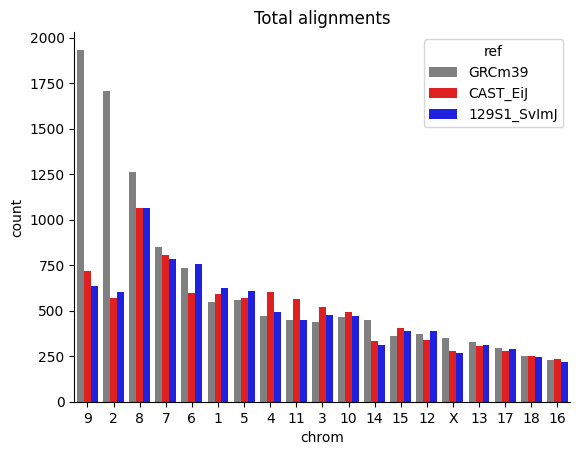

In [3]:
chroms = ['9', '2', '8', '7', '6', '1', '5','4', '11', '3', '10', '14', '15', '12', 'X', '13','17', '18', '16',]

pdf = res.copy()
pdf = pd.DataFrame(pdf[['chrom', 'ref']].value_counts()).reset_index(drop=False)
pdf = pdf[pdf['chrom'].isin(chroms)]

sns.barplot(data=pdf, 
            x='chrom', 
            y='count',
            hue='ref',
            palette=['grey', 'r', 'b'])

plt.title('Total alignments')
sns.despine()

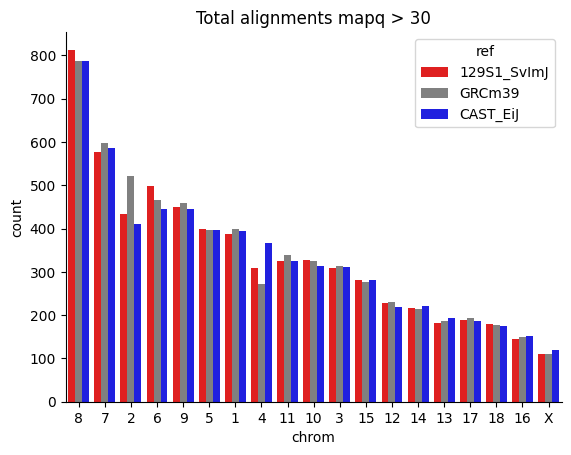

In [4]:
chroms = ['9', '2', '8', '7', '6', '1', '5','4', '11', '3', '10', '14', '15', '12', 'X', '13','17', '18', '16',]

pdf = res.copy()
pdf = pdf[pdf['mapping_quality'] > 30]

pdf = pd.DataFrame(pdf[['chrom', 'ref']].value_counts()).reset_index(drop=False)
pdf = pdf[pdf['chrom'].isin(chroms)]

sns.barplot(data=pdf, 
            x='chrom', 
            y='count',
            hue='ref',
            palette=['r', 'grey', 'b'],
           )

plt.title('Total alignments mapq > 30')
sns.despine()

# chromosome 2 alignments

pdf.shape=(1366, 10)


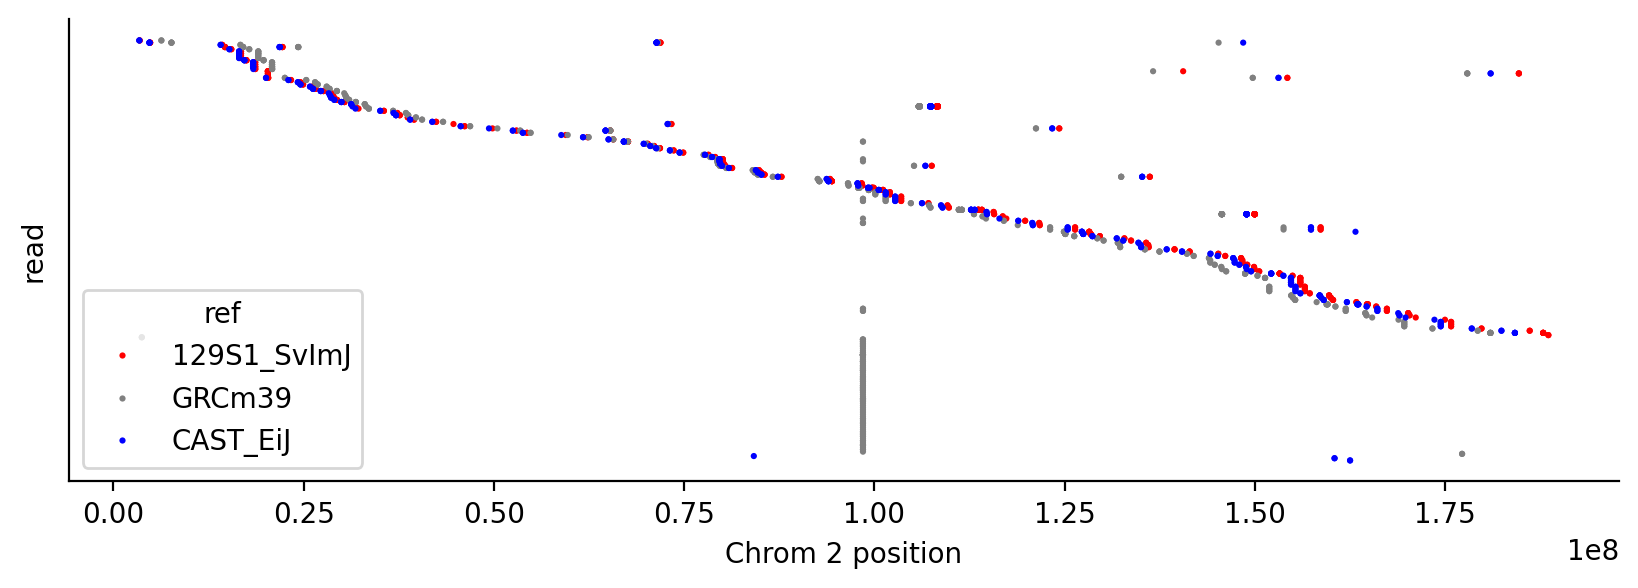

In [5]:
pdf = res.copy()
pdf = pdf[pdf['chrom'] == '2']
pdf = pdf[pdf['mapping_quality'] > 30]

print(f"{pdf.shape=}")

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 3
sns.scatterplot(data=pdf, 
                y='read_name',
                x='ref_start',
                hue='ref',
                ec='none',
                marker=".",
                palette=['r', 'grey', 'b'],
                s=20)

plt.ylabel('read')
plt.xlabel('Chrom 2 position')

plt.yticks([])
sns.despine()

pdf.shape=(1366, 10)


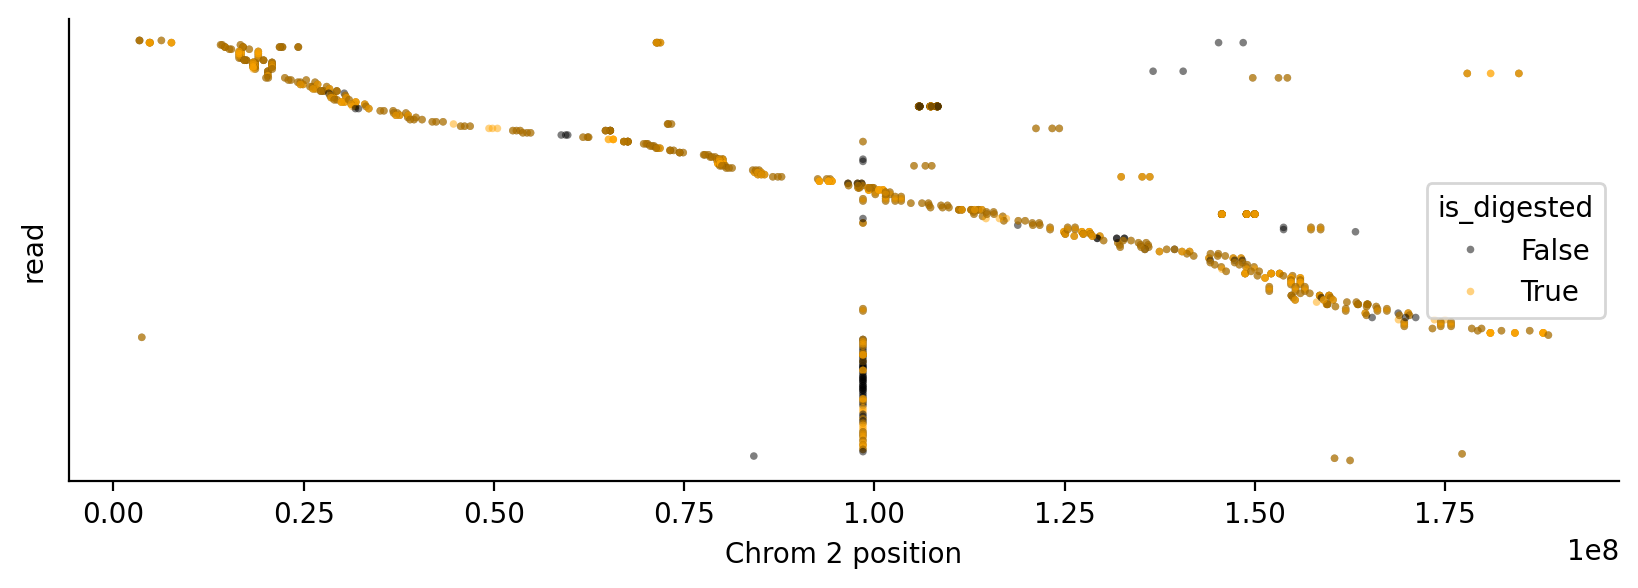

In [6]:
pdf = res.copy()
pdf = pdf[pdf['chrom'] == '2']
pdf = pdf[pdf['mapping_quality'] > 30]

print(f"{pdf.shape=}")

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 3
sns.scatterplot(data=pdf, 
                y='read_name',
                x='ref_start',
                hue='is_digested',
                ec='none',
                alpha=0.5,
                marker=".",
                palette=['k', 'orange'],
                s=30)

plt.ylabel('read')
plt.xlabel('Chrom 2 position')

plt.yticks([])
sns.despine()

# loop through reads

In [7]:
pdf = res.copy()
pdf = pdf[pdf['chrom'].isin(chroms)]
pdf = pdf[pdf['mapping_quality'] > 30]

pdf['n_ref_per_read'] = pdf.groupby('read_name')['ref'].transform('nunique')

pdf['n_ref_per_read'].value_counts()

n_ref_per_read
3    18840
2      223
1       41
Name: count, dtype: int64

In [8]:
pdf = res.copy()
pdf = pdf[pdf['chrom'].isin(chroms)]
pdf = pdf[pdf['mapping_quality'] > 30]
pdf['n_ref_per_read'] = pdf.groupby('read_name')['ref'].transform('nunique')
pdf = pdf[pdf['n_ref_per_read'] > 2]

for read_name, group in pdf.groupby('read_name'):
    if len(group) > 3:

        # sns.scatterplot(data=group,
        #                 x='read_start',
        #                 y='chrom',
        #                 alpha=0.4,
        #                 hue='ref')
        
        break

In [9]:
group

,read_name,is_digested,mapping_quality,flag,chrom,read_start,read_end,ref_start,ref_end,ref,n_ref_per_read
2638,0089ea83-0f6a-47e2-9c0b-c2999ae08a27,False,60,-1,5,0,239,129705726,129705966.0,129S1_SvImJ,3
2639,0089ea83-0f6a-47e2-9c0b-c2999ae08a27,True,60,5,5,1328,1562,129705726,129705961.0,129S1_SvImJ,3
2640,0089ea83-0f6a-47e2-9c0b-c2999ae08a27,False,60,-1,5,0,220,129705743,129705966.0,129S1_SvImJ,3
2641,0089ea83-0f6a-47e2-9c0b-c2999ae08a27,True,60,6,5,1562,1732,129705747,129705922.0,129S1_SvImJ,3
2740,0089ea83-0f6a-47e2-9c0b-c2999ae08a27,False,60,-1,5,0,247,149283228,149283494.0,129S1_SvImJ,3
2741,0089ea83-0f6a-47e2-9c0b-c2999ae08a27,True,43,8,5,1827,1951,149283228,149283353.0,129S1_SvImJ,3
2742,0089ea83-0f6a-47e2-9c0b-c2999ae08a27,False,60,-1,5,0,267,149283228,149283500.0,129S1_SvImJ,3
2743,0089ea83-0f6a-47e2-9c0b-c2999ae08a27,True,60,4,5,1201,1328,149283228,149283355.0,129S1_SvImJ,3
2744,0089ea83-0f6a-47e2-9c0b-c2999ae08a27,True,60,3,5,1014,1149,149283355,149283495.0,129S1_SvImJ,3
2745,0089ea83-0f6a-47e2-9c0b-c2999ae08a27,True,60,9,5,1956,2053,149283397,149283494.0,129S1_SvImJ,3
